# <center>Homework Assignment 7: Classification</center>
## <center>31st October 2024</center>
#### <center>Syed Asghar Abbas Zaidi 07201 in CS/CE 457/464-L1</center>
#### <center>sz07201@st.habib.edu.pk</center>

## Importing Libraries

In [5]:
import pandas as pd
from sklearn import tree #Decision Trees
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [11]:
df_ad = pd.read_csv('Admission_Chance_Classification.csv')
df_bor = pd.read_csv('burger-king-menu-2.csv')

# Classification using Admission_Chance_Classification.csv 

In [17]:
df_ad.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,337,118,4,4.5,4.5,9.65,YES,YES
1,324,107,4,4.0,4.5,8.87,YES,YES
2,316,104,3,3.0,3.5,8.00,YES,YES
3,322,110,3,3.5,2.5,8.67,YES,YES
4,314,103,2,2.0,3.0,8.21,NO,YES


#### Create a train and test set. Consider Admit column as class/label column (Y) and use rest of the columns as inputs (X). Use 30% (test_size=0.3) records for test set. Use the same train and test set for all your analysis with different classifiers.

In [23]:
X_ad = df_ad.drop(['Admit'],axis=1)
Y_ad = df_ad['Admit']

In [27]:
X_ad.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,YES
1,324,107,4,4.0,4.5,8.87,YES
2,316,104,3,3.0,3.5,8.00,YES
3,322,110,3,3.5,2.5,8.67,YES
4,314,103,2,2.0,3.0,8.21,NO


In [34]:
Y_ad.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: Admit, dtype: object

#### 2. In your code, set the seed after you read the data. This will keep your data and calculation consistent throughout the analysis irrespective of multiple runs. See the example code for the class random_state=99 

In [38]:
dt = tree.DecisionTreeClassifier(random_state=99)

## 3. Create a classification model to predict Admit status using Decision Tree. Visualize the decision tree. Interpret the decision tree. Discuss which attributes are important and which are not important. 
#### 3.1. Create a classification model to predict Admit status using Decision Tree.

In [41]:
X_ad.dtypes

GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
 SOP                 float64
LOR                  float64
CGPA                 float64
Research              object
dtype: object

In [44]:
X_ad = pd.get_dummies(X_ad, columns = ['Research'], dtype=int)

In [46]:
X_ad.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research_NO,Research_YES
0,337,118,4,4.5,4.5,9.65,0,1
1,324,107,4,4.0,4.5,8.87,0,1
2,316,104,3,3.0,3.5,8.00,0,1
3,322,110,3,3.5,2.5,8.67,0,1
4,314,103,2,2.0,3.0,8.21,1,0


In [49]:
X_ad_train, X_ad_test, y_ad_train, y_ad_test = train_test_split(X_ad, Y_ad, test_size=0.3, random_state=99)

In [54]:
X_ad_train.head()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research_NO,Research_YES
376,297,96,2,2.5,2.0,7.43,1,0
171,334,117,5,4.0,4.5,9.07,0,1
115,310,106,4,4.5,4.5,9.04,0,1
24,336,119,5,4.0,3.5,9.80,0,1
43,332,117,4,4.5,4.0,9.10,1,0


In [58]:
X_ad_train.shape

(280, 8)

In [66]:
y_ad_train

376     NO
171    YES
115    YES
24     YES
43     YES
      ... 
201    YES
168    YES
185    YES
35     YES
129    YES
Name: Admit, Length: 280, dtype: object

In [125]:
y_ad_train.shape

(280,)

In [127]:
dtmodel_ad = dt.fit(X_ad_train, y_ad_train) # training the model, training the classifier

In [129]:
train_ad_pred = dtmodel_ad.predict(X_ad_train)

In [131]:
train_ad_pred

array(['NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
     

#### As a rule of thumb, we evaluate both the training and testing accuracy to validate the model. Usually training set accuracy is higher than testing set accuracy because we expose our training set output (Y) to model during training 

In [134]:
## train_pred is the prediction generated by model (predicted) and y_train is called the actual value/true value (coming from original dataset)
acc = accuracy_score(train_ad_pred, y_ad_train)
acc*100

100.0

In [136]:
test_ad_pred = dtmodel_ad.predict(X_ad_test)

In [138]:
test_ad_pred

array(['YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES'],
      dtype=object)

In [140]:
acc = accuracy_score(test_ad_pred, y_ad_test)
acc*100

89.16666666666667

### We observe overfitting above because training accuracy is very high and testing accuracy is low. Lets see the tree if it is complex or not. Lets see the tree if it is complex or not.
#### 3. Create a classification model to predict Admit status using Decision Tree. Visualize the decision tree. Interpret the decision tree. Discuss which attributes are important and which are not important. 

In [143]:
text_representation = tree.export_text(dtmodel_ad)
print(text_representation)

|--- feature_5 <= 7.85
|   |--- feature_4 <= 2.75
|   |   |--- feature_0 <= 301.50
|   |   |   |--- class: NO
|   |   |--- feature_0 >  301.50
|   |   |   |--- feature_5 <= 7.57
|   |   |   |   |--- feature_0 <= 313.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_0 >  313.50
|   |   |   |   |   |--- class: NO
|   |   |   |--- feature_5 >  7.57
|   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |--- class: YES
|   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |--- class: NO
|   |--- feature_4 >  2.75
|   |   |--- feature_3 <= 3.50
|   |   |   |--- class: YES
|   |   |--- feature_3 >  3.50
|   |   |   |--- class: NO
|--- feature_5 >  7.85
|   |--- feature_4 <= 1.75
|   |   |--- feature_7 <= 0.50
|   |   |   |--- class: NO
|   |   |--- feature_7 >  0.50
|   |   |   |--- class: YES
|   |--- feature_4 >  1.75
|   |   |--- feature_5 <= 8.31
|   |   |   |--- feature_5 <= 8.29
|   |   |   |   |--- feature_1 <= 109.50
|   |   |   |   |   |--- feature_1 <= 10

#### 3.2 Visualize the decision tree. Interpret the decision tree. Discuss which attributes are important and which are not important. 

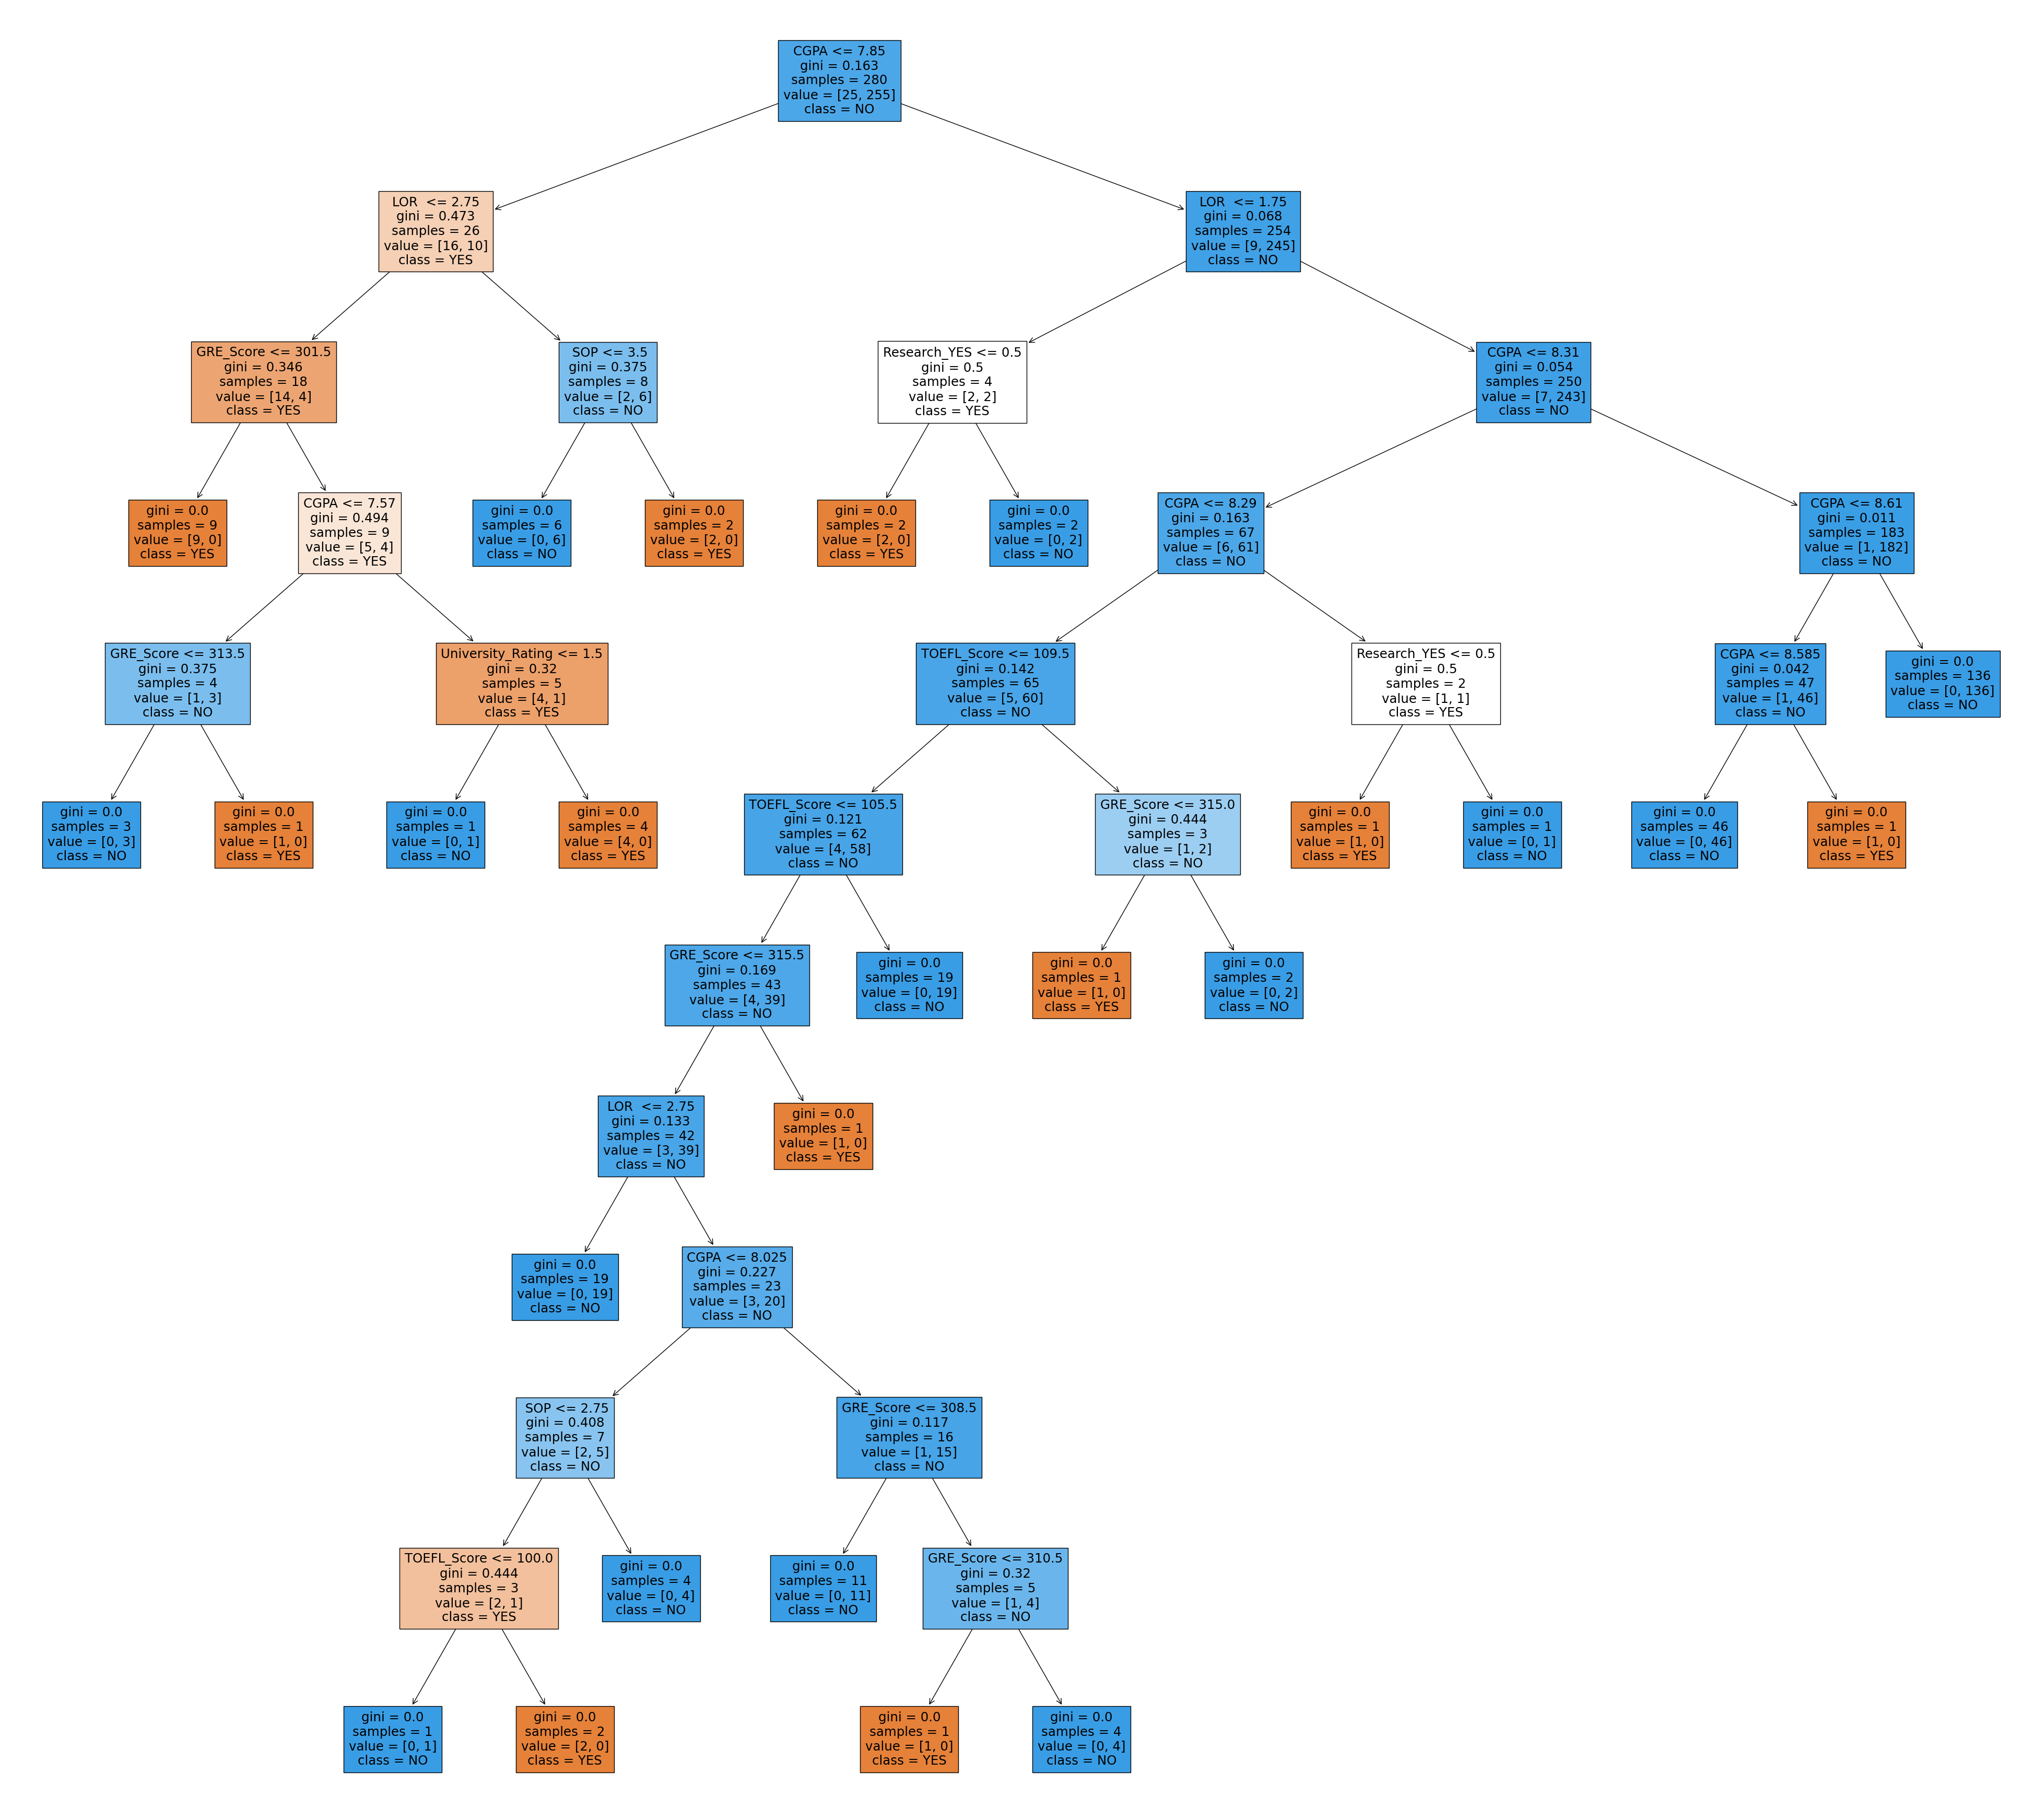

In [149]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel_ad, 
                   feature_names=list(X_ad.columns),  
                   class_names=Y_ad.value_counts().index,
                   filled=True)

### INTERPRETATION
CGPA is the most important and significant column while predicting the Admit. 
University_Rating attribute that appears in tree depth 4 is pretty less significant and less important

In [196]:
# Using entropy as criteria to choose best feature for tree as a root. Guinea Index is used as default m
dt_ad = tree.DecisionTreeClassifier(criterion='entropy',random_state=99)
dtmodel_ad2 = dt_ad.fit(X_ad_train, y_ad_train)

train_pred2 = dtmodel_ad2.predict(X_ad_train)
acc = accuracy_score(train_pred2, y_ad_train)

test_pred2 = dtmodel_ad2.predict(X_ad_test)
acc2 = accuracy_score(test_pred2, y_ad_test)
[acc*100, acc2*100]

[100.0, 86.66666666666667]

Meaning "entropy" might be a less suitable choice to decide the important attribute as the accuracy of the model falls from around 89 Percent

#### Very high training set accuracy is a sign of Model Overfitting (see lecture notes). It means model focused too much on training set that it fails to generalize the relationship for test set (unknow or new data)

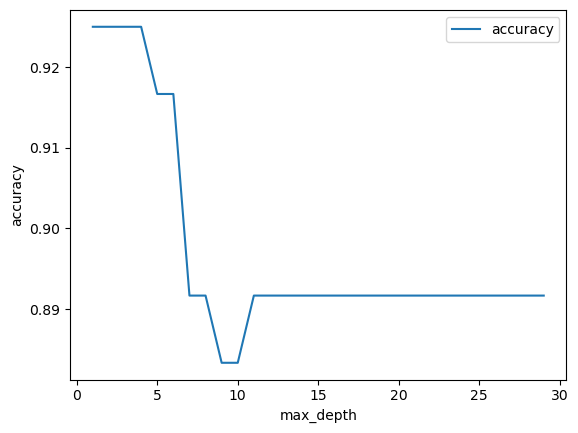

In [205]:
max_depth = []
acc = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(max_depth=i,random_state=100)
    dtree.fit(X_ad_train, y_ad_train)
    pred = dtree.predict(X_ad_test)
    acc.append(accuracy_score(y_ad_test, pred))
    max_depth.append(i)
    
d = pd.DataFrame({'accuracy':pd.Series(acc),'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot(d['max_depth'].values,d['accuracy'].values)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(["accuracy"])

In [234]:
# Pruned Model
dt_ad_pruned = tree.DecisionTreeClassifier(max_depth=3,random_state=99) ##defining model
dtmodel_ad_pruned = dt_ad_pruned.fit(X_ad_train, y_ad_train)
train_ad_pred = dtmodel_ad_pruned.predict(X_ad_train)
acc = accuracy_score(train_ad_pred, y_ad_train)

test_ad_pred = dtmodel_ad_pruned.predict(X_ad_test) ##using
acc2 = accuracy_score(test_ad_pred, y_ad_test)
[acc*100, acc2*100]

[96.07142857142857, 93.33333333333333]

As can be observed, Pruning helped increasing the accuracy on test data

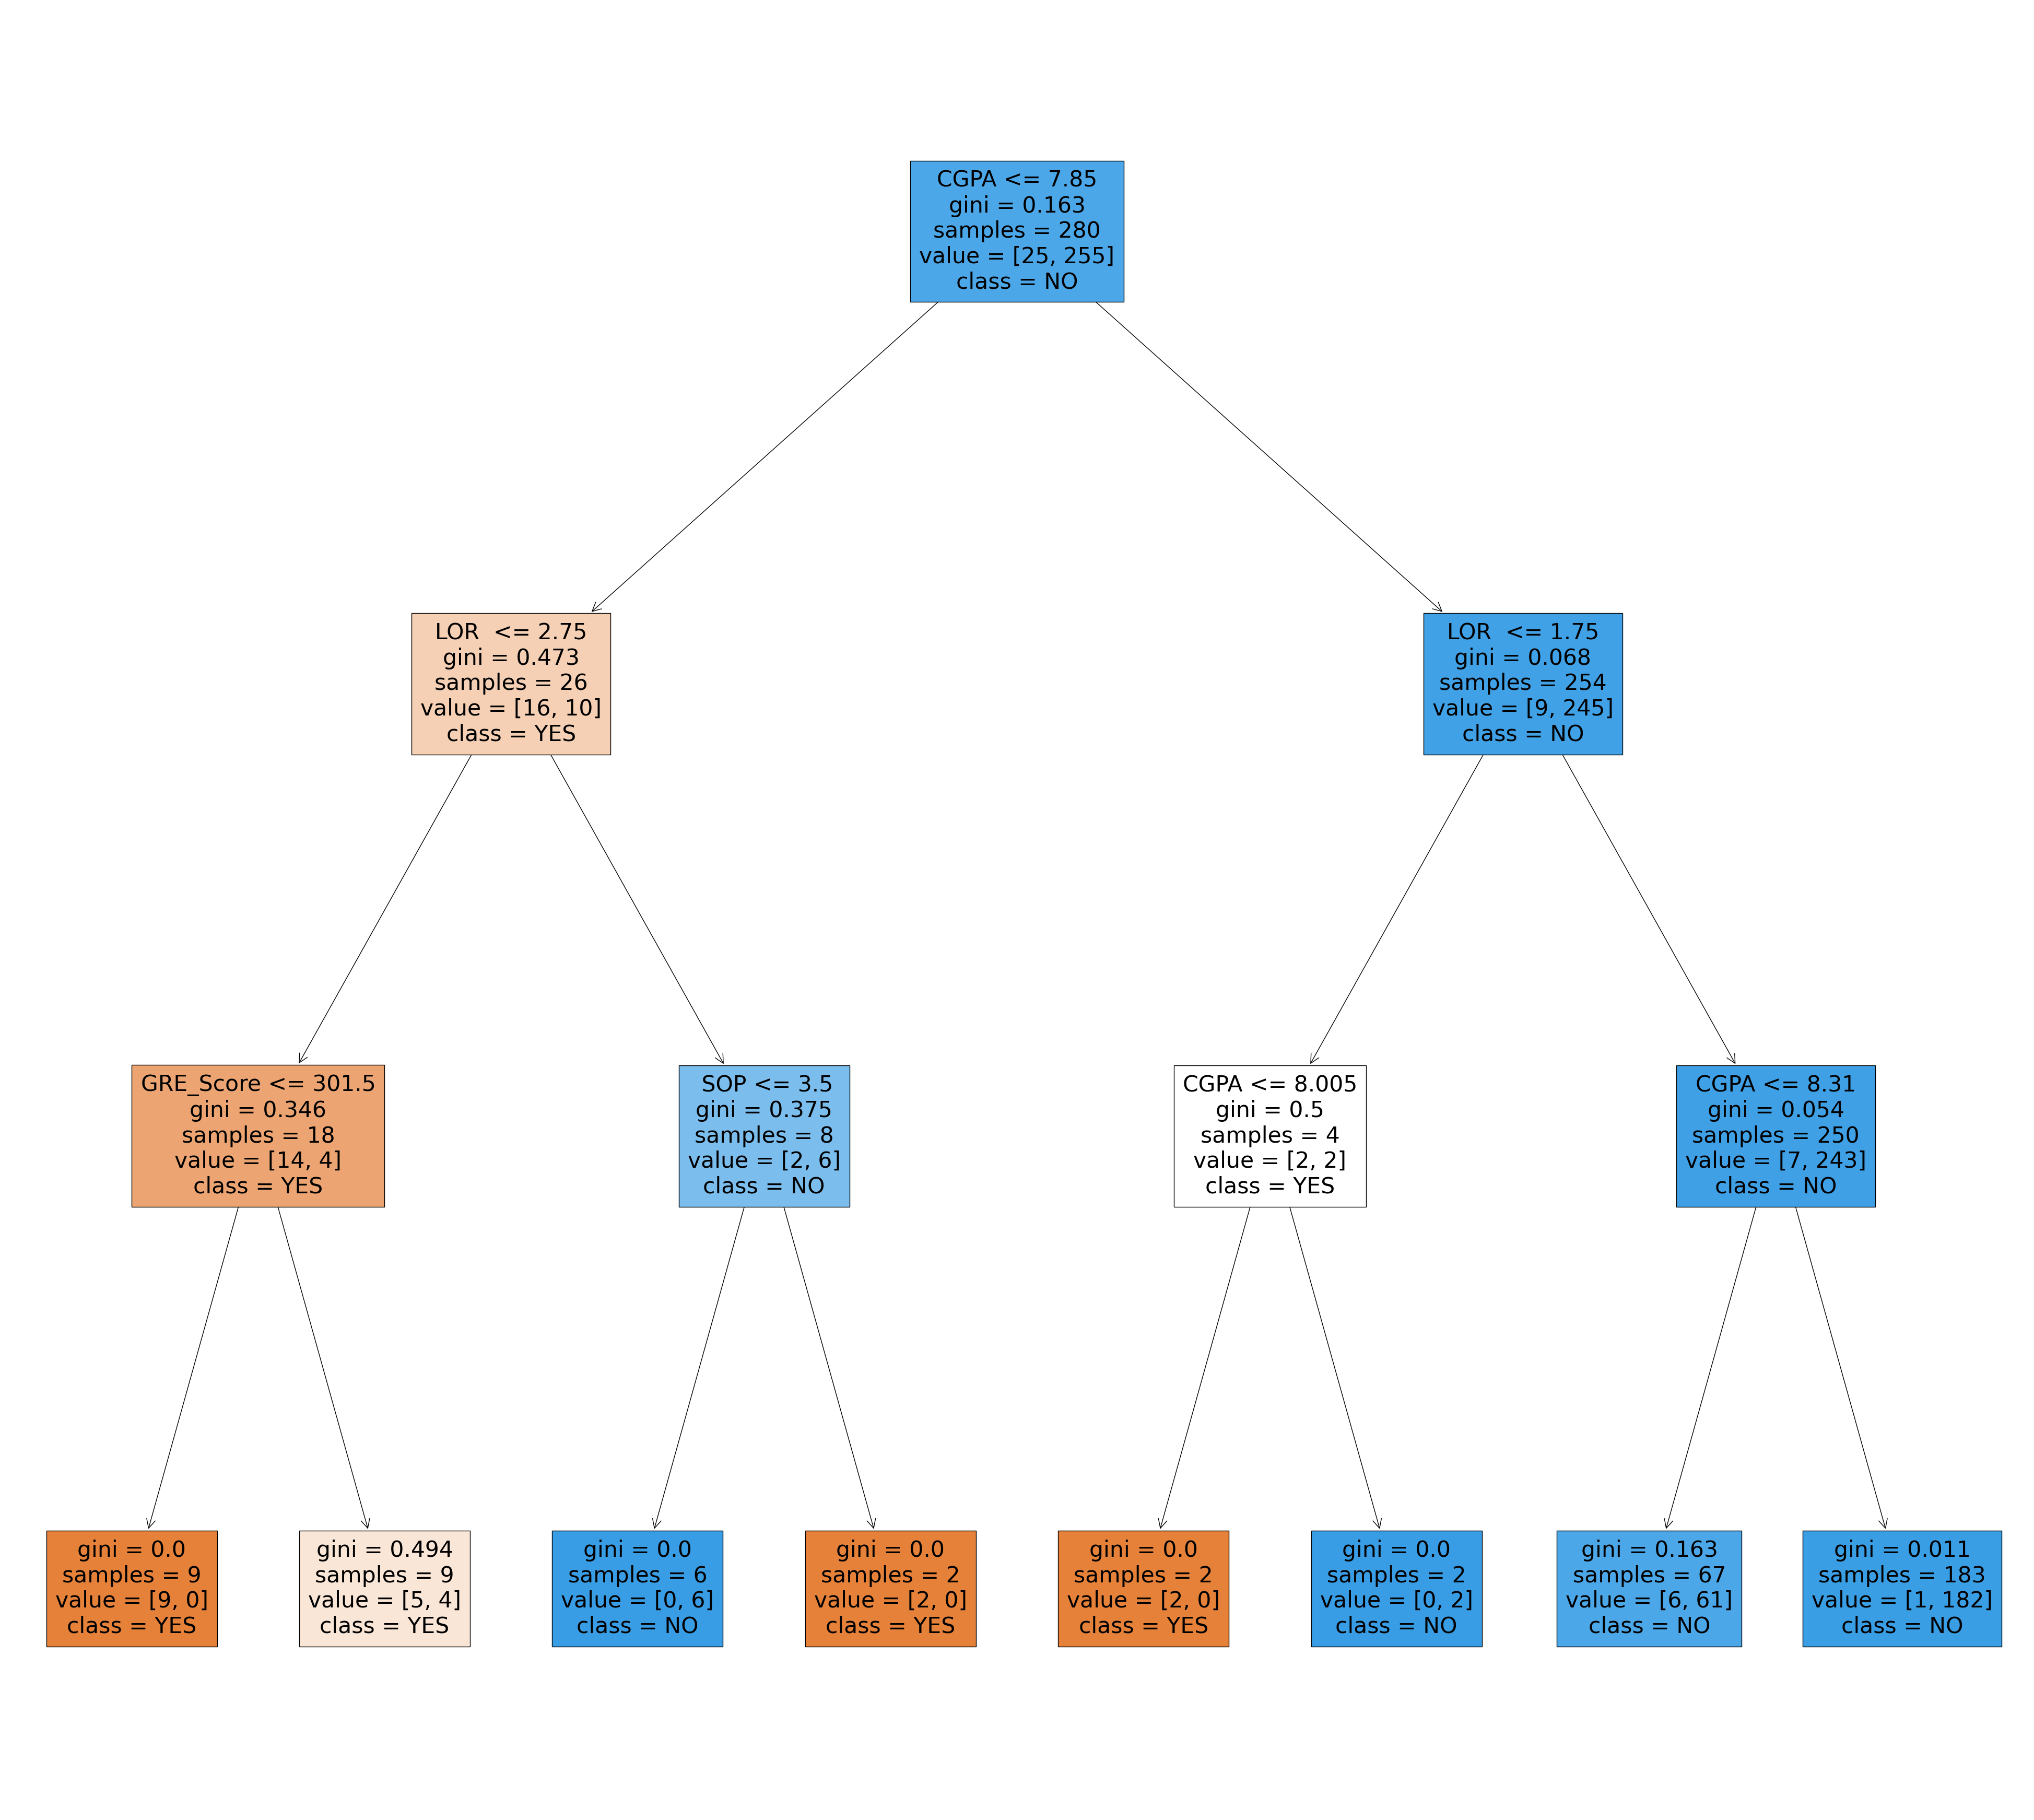

In [236]:
fig = plt.figure(figsize=(50,45))
_ = tree.plot_tree(dtmodel_ad_pruned, 
                   feature_names=list(X_ad.columns),  
                   class_names=Y_ad.value_counts().index,
                   filled=True)